# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 1. `Numpy`, `matplotlib`, `scipy.stats`

При возникновении сложностей, связанных с Питоном и библиотеками, посмотрите материалы видео-курса <a href="https://mipt-stats.gitlab.io/courses/python.html">Python для анализа данных</a>. Если не помогло, задайте вопрос по заданию.

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Работы, присланные иным способом, не принимаются.
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате ipynb. 
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.

**Баллы за задание:**

<font color="blue"><b>Легкая часть</b></font> (достаточно на "хор"):
* Задача 1.1 — 3 балла
* Задача 1.2 — 3 балла
* Задача 2 — 3 балла

<font color="orange"><b>Сложная часть</b></font> (необходимо на "отл"):
* Задача 1.3 — 3 балла
* Задача 3.1 — 3 балла
* Задача 3.2 — 3 балла
* Задача 3.3 — 3 балла
* Задача 4 — 4 балла


In [326]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets

import typing

%matplotlib inline

### <font color="blue"><i>Легкая часть: генерация</i></font>

<font color="red">В этой части другие библиотеки использовать запрещено. Шаблоны кода ниже менять нельзя. </font>

### Задача 1
Имеется симметричная монета. Напишите функцию генерации независимых случайных величин из нормального и экспоненциального распределений с заданными параметрами.

In [327]:
# Эта ячейка -- единственная в задаче 1, в которой нужно использовать
# библиотечную функция для генерации случайных чисел.
# В других ячейках данной задачи используйте функцию coin.

# симметричная монета
coin = sps.bernoulli(p=0.5).rvs

Проверьте работоспособность функции, сгенерировав 10 бросков симметричной монеты.

In [328]:
coin(size=10)

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1])

**Часть 1.** Напишите сначала функцию генерации случайных величин из равномерного распределения на отрезке $[0, 1]$ с заданной точностью. Это можно сделать, записав случайную величину $\xi \sim U[0, 1]$ в двоичной системе системе счисления $\xi = 0,\xi_1\xi_2\xi_3...$. Тогда $\xi_i \sim Bern(1/2)$ и независимы в совокупности. Приближение заключается в том, что вместо генерации бесконечного количества $\xi_i$ мы полагаем $\xi = 0,\xi_1\xi_2\xi_3...\xi_n$.

Нужно реализовать функцию нужно так, чтобы она могла принимать на вход в качестве параметра `size` как число, так и объект `tuple` любой размерности, и возвращать объект `numpy.array` соответствующей размерности. Например, если `size=(10, 1, 5)`, то функция должна вернуть объект размера $10 \times 1 \times 5$. Кроме того, функцию `coin` можно вызвать только один раз, и, конечно же, не использовать какие-либо циклы. Аргумент `precision` отвечает за число $n$.

In [336]:
def uniform(size=(2, 5), precision=30): #????????????????????????????????????????????????????????????????
    res = np.zeros(size, dtype=float)
#     print(res)
    cnt = res.size
#     print(cnt)
    random_variables = coin(size = precision * cnt).reshape((cnt, precision)).astype(str)
#     print(random_variables)
    def f(i):
        return int(''.join(i), 2) / 2**precision
    random_variables = [f(i) for i in random_variables]
#     print(random_variables)
#     res += float('0.' + ''.join(random_variables))
    return random_variables
uniform()


[0.5281741674989462,
 0.5446509923785925,
 0.4493383439257741,
 0.8493267334997654,
 0.6713226391002536,
 0.2558869980275631,
 0.7699231989681721,
 0.28875642269849777,
 0.5338188819587231,
 0.1812770590186119]

Для $U[0, 1]$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-0.25, 1.25]$, а также гистограмму по сгенерированным случайным величинам.

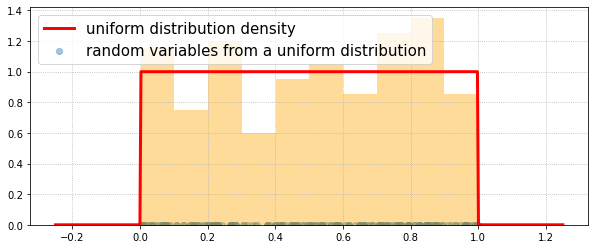

In [376]:
size = 200
grid = np.linspace(-0.25, 1.25, 500) 
        #<функция из numpy для создания равномерной сетки 
        #от -0.25 до 1.25 на 500 точек>
sample = uniform(size, 50) #<Сгенерируйте size случайных величин точности 50>

# Отрисовка графика
plt.figure(figsize=(10, 4))#<определите график размера 10 на 4>

# отображаем значения случайных величин полупрозрачными точками
plt.scatter(
    sample, 
    np.zeros(size), 
    alpha=0.4, # <прозрачность точки равна 0.4>, 
    label=r'random variables from a uniform distribution'  #<подпись точек в легенде к графику>
)

# по точкам строим нормированную полупрозрачную гистограмму
plt.hist(
    sample, 
    bins=10, #<10 столбиков>, 
    density = True, #<нормировка столбиков>, ????????????????????????????????????????????????????????????????
    alpha=0.4,  #<прозрачность столбиков равна 0.4>, 
    color='orange'  #<оранжевый цвет столбиков>
)

# # рисуем график плотности
plt.plot(
    grid, 
    sps.uniform.pdf(grid),  
        #<Посчитайте плотность в точках grid, используя sps.uniform.pdf>, 
    color='r',  #<красный цвет линии>, 
    linewidth=3, #<толщина линии равна 3>, 
    label=r'uniform distribution density'  #<подпись линии в легенде к графику>
)
plt.legend(fontsize=15, loc=2)
plt.grid(ls=':')
plt.show()

Исследуйте, как меняются значения случайных величин в зависимости от `precision`.

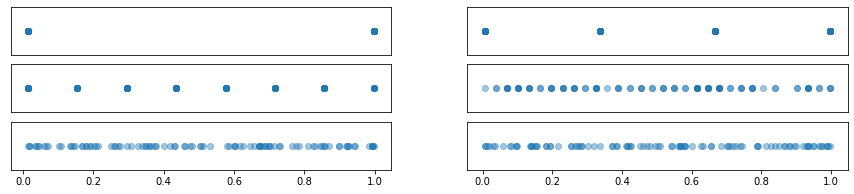

In [338]:
size = 100

plt.figure(figsize=(15, 3))  #<определите график размера 15 на 3>

for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
    plt.subplot(3, 2, i + 1)
    plt.scatter(
        uniform(size, precision),  #<Сгенерируйте выборку размера size точности precision>, 
        np.zeros(size), 
        alpha=0.4  #<прозрачность точки равна 0.4>
    )
    plt.yticks([])
    if i < 4: plt.xticks([])

plt.show()

**Вывод:**

Гистограмма неплохо демонстирует, что на рисунке мы имеем равномерное распределение (при size ≈ 20000) гистаграмма практически идет по красной линии плотности равномерного распределения).
Второй график тоже вполне логичен, так как при малых precision возможные принимаемые значения случайной ведичины очень отличаются, при больших precision возможные принимаемые значения случайной величины уже отличаются мало.

**Часть 2.** Напишите функцию генерации случайных величин в количестве `size` штук из распределения $\mathcal{N}(loc, scale^2)$ с помощью преобразования Бокса-Мюллера, которое заключается в следующем. Пусть $\xi$ и $\eta$ — независимые случайные величины, равномерно распределенные на $(0, 1]$. Тогда случайные величины $X = cos(2\pi\xi)\sqrt{-2\ln\eta}, Y = sin(2\pi\xi)\sqrt{-2\ln\eta}$ являются независимыми нормальными $\mathcal{N}(0, 1)$.

Реализация должна быть без циклов. В качестве параметра `size` может быть как число, так и объект `tuple` любой размерности. Желательно использовать как можно меньше бросков монеты. Можно использовать реализованную ранее функцию `uniform`.

In [368]:
def normal(size=(4, 3), loc=0, scale=1, precision=30):
    res = np.zeros(size)
    rand_vars_u_distr1 = uniform(res.size, 30)
    rand_vars_u_distr2 = uniform(res.size, 30)
    
    rand_vars_n_distr = zip(rand_vars_u_distr1, rand_vars_u_distr2)
    rand_vars_n_distr = np.array(list(map(lambda t: 
                                np.cos(2*np.pi*t[0])*(-2*np.log(t[1]))**0.5
                                    , rand_vars_n_distr)))
    
    
    rand_vars_n_distr = rand_vars_n_distr.reshape(size)
#     print(rand_vars_n_distr)
    
    return rand_vars_n_distr
    
# normal()

Для $\mathcal{N}(0, 1)$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-3, 3]$, а также гистограмму по сгенерированным случайным величинам.

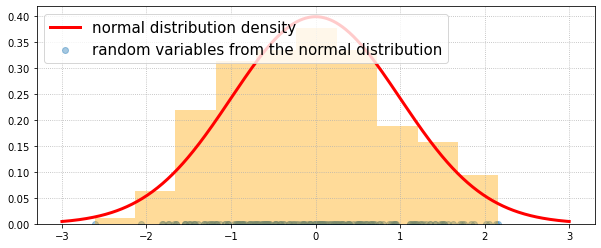

In [374]:
size = 200
grid = np.linspace(-3, 3, 500) 
        #<функция из numpy для создания равномерной сетки 
        #от -0.25 до 1.25 на 500 точек>
sample = normal(size) #<Сгенерируйте size случайных величин точности 50>

# Отрисовка графика
plt.figure(figsize=(10, 4))#<определите график размера 10 на 4>

# отображаем значения случайных величин полупрозрачными точками
plt.scatter(
    sample, 
    np.zeros(size), 
    alpha=0.4, # <прозрачность точки равна 0.4>, 
    label=r'random variables from the normal distribution'  #<подпись точек в легенде к графику>
)

# по точкам строим нормированную полупрозрачную гистограмму
plt.hist(
    sample, 
    bins=10, #<10 столбиков>, 
    density = True, #<нормировка столбиков>, ????????????????????????????????????????????????????????????????
    alpha=0.4,  #<прозрачность столбиков равна 0.4>, 
    color='orange'  #<оранжевый цвет столбиков>
)

# # рисуем график плотности
plt.plot(
    grid, 
    sps.norm.pdf(grid),  
        #<Посчитайте плотность в точках grid, используя sps.uniform.pdf>, 
    color='r',  #<красный цвет линии>, 
    linewidth=3, #<толщина линии равна 3>, 
    label=r'normal distribution density'  #<подпись линии в легенде к графику>
)
plt.legend(fontsize=15, loc=2)
plt.grid(ls=':')
plt.show()

### <font color="orange"><i>Сложная часть: генерация</i></font>

**Часть 3.** Вы уже научились генерировать выборку из равномерного распределения. Напишите функцию генерации выборки из экспоненциального распределения, используя задачу из теории вероятностей:

*Если $\xi$ — случайная величина, имеющая абсолютно непрерывное распределение, и $F$ — ее функция распределения, то случайная величина $F(\xi)$ имеет равномерное распределение на $[0, 1]$*.

Какое преобразование над равномерной случайной величиной необходимо совершить? Поясните ответ.

<...>

Для получения полного балла реализация должна быть без циклов, а параметр `size` может быть типа `tuple`.

In [ ]:
def expon(size=1, lambd=1, precision=30):
    return <...>

Для $Exp(1)$ сгенерируйте выборку размера 100 и постройте график плотности этого распределения на отрезке $[-0.5, 5]$.

In [ ]:
<...>

**Вывод по задаче:**

<...>

### <font color="blue"><i>Легкая часть: матричное умножение</i></font>

### Задача 2
Напишите функцию, реализующую матричное умножение. При вычислении разрешается создавать объекты размерности три. Запрещается пользоваться функциями, реализующими матричное умножение, например, `numpy.dot`, операция `@`, операция умножения в классе `numpy.matrix`, суммы Эйнштейна и прочие. Разрешено пользоваться только простыми поэлементными векторно-арифметическими операциями над `numpy.array`, любыми операциями изменения формы массива. 

*Авторское решение занимает одну строчку.*

In [320]:
def matrix_multiplication(A, B):    
    ay, ax = A.shape
    by, bx = B.shape
    C = np.zeros((ay, bx))
    for i in range(ay):
        for j in range(bx):
            C[i, j] = sum(A[i] * B[:, j])
    return C

A = np.array([[1, 6], [3, 4]])
B = np.array([[5, 6], [0, 7]])
print(matrix_multiplication(A, B))
print(A @ B)

[[ 5. 48.]
 [15. 46.]]
[[ 5 48]
 [15 46]]


Проверьте правильность реализации на случайных матрицах. Должен получится ноль, либо очень малое число в пределах машинной точности.

In [321]:
A = sps.uniform.rvs(size=(10, 20))
B = sps.uniform.rvs(size=(20, 30))
np.abs(matrix_multiplication(A, B) - A @ B).sum()

8.43769498715119e-14

На основе опыта: вот в таком стиле многие из вас присылали бы нам свои работы, если не стали бы делать это задание :)

In [322]:
def stupid_matrix_multiplication(A, B):
    C = [[0 for j in range(len(B[0]))] for i in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                C[i][j] += A[i][k] * B[k][j]
    return C

Проверьте, насколько быстрее работает ваш код по сравнению с неэффективной реализацией `stupid_matrix_multiplication`. Эффективный код на авторском ноутбуке работает почти в 200 раз быстрее. Для примера посмотрите также, насколько быстрее работают встроенные `numpy`-функции.

In [323]:
A = sps.uniform.rvs(size=(400, 200))
B = sps.uniform.rvs(size=(200, 300))

%time C1 = matrix_multiplication(A, B)
%time C2 = A @ B  # python 3.5
%time C3 = np.matrix(A) * np.matrix(B)
%time C4 = stupid_matrix_multiplication(A, B)
%time C5 = np.einsum('ij,jk->ik', A, B) 

CPU times: user 3.31 s, sys: 8.62 ms, total: 3.32 s
Wall time: 3.33 s
CPU times: user 8.48 ms, sys: 8.22 ms, total: 16.7 ms
Wall time: 18.8 ms
CPU times: user 7.89 ms, sys: 946 µs, total: 8.84 ms
Wall time: 2.46 ms
CPU times: user 17.3 s, sys: 52.2 ms, total: 17.3 s
Wall time: 16.8 s
CPU times: user 14.5 ms, sys: 865 µs, total: 15.4 ms
Wall time: 16.4 ms


Ниже для примера приведена полная реализация функции. Ваc мы, конечно, не будем требовать проверять входные данные на корректность, но документации к функциям нужно писать.

In [ ]:
def matrix_multiplication(A, B):
    '''Возвращает матрицу, которая является результатом
    матричного умножения матриц A и B.
    
    '''
    
    # Если A или B имеют другой тип, нужно выполнить преобразование типов
    A = np.array(A)
    B = np.array(B)
    
    # Проверка данных входных данных на корректность
    assert A.ndim == 2 and B.ndim == 2, 'Размер матриц не равен 2'
    assert A.shape[1] == B.shape[0], \
        ('Матрицы размерностей {} и {} неперемножаемы'.format(A.shape, B.shape))
    
    C = <...>
    
    return C

### <font color="orange"><i>Сложная часть: броуновское движение</i></font>

### Задача 3

<a target="_blank" href="https://ru.wikipedia.org/wiki/Броуновское_движение">Броуновское движение</a> — беспорядочное движение микроскопических видимых взвешенных частиц твёрдого вещества в жидкости или газе, вызываемое тепловым движением частиц жидкости или газа. 

Математически броуновское движение обычно моделируется как некоторая случайная функция $X_t$ аргумента $t$, который несет смысл времени. В каждый фиксированный момент времени $t$, значение $X_t$ является случайной величиной, характеризующей положение частицы в момент времени $t$. Считается, что для любого интервала времени $(s, t)$ перемещение (точнее, приращение) частицы за этот интервал времени имеет нормальное распределение: $X_t - X_s \sim \mathcal{N}(0, (t-s)\sigma^2)$. Причем величина $X_t - X_s$ не зависит от приращения частицы за другие интервалы времени, не пересекающиеся с интервалом $(s, t)$. Математическая корректность данного определения будет доказана в курсе случайных процессов.

Многомерное броуновское движение соответствует одномерным по каждой координате.

Сгенерировать траекторию частицы в интервале времени $(0, T)$ в предположении броуновского движения можно следующим образом:
1. Выбрать начальное положение, обычно это начало координат.
2. Разбить интервал $(0, T)$ равномерно на интервалы длины $\Delta t$. Величина $\Delta t$ должна быть достаточно мала, в частности, на графиках не должно быть видно дискретности компьютерной генерации. 
3. Сгенерировать приращение частицы на каждом интервале по каждой координате независимо из распределения $\mathcal{N}(0, \sigma^2 \Delta t)$.
4. Для получения значений $X_t$ просуммировать необходимые приращения.



**1.**
Реализуйте функцию семплирования траекторий броуновского движения. Функция должна принимать в качестве аргументов:
- Параметр $\sigma$;
- Время $T$;
- Количество интервалов длины $\Delta t$;
- Размерность пространства, в котором реализуется траектория;
- Количество различных частиц, для которых нужно сгенерировать траектории.

Функция должна вернуть трехмерный массив `result`, где `result[i, j, k]` &mdash; значение $j$-й координаты $i$-й частицы на $k$-м шаге.

При реализации считайте, что все частицы в начальный момент времени находятся в начале координат.
Функцию нужно реализовать для произвольной размерности, не используя циклы. Можно использовать функции из `scipy`.

In [ ]:
<...>

**2.**
Визуализируйте траектории для двумерного броуновского движения для трех разных значений $\sigma$. Число интервалов не менее 10000. Для каждого значения $\sigma$ постройте 6 разных частиц в виде сетки графиков $2 \times 3$. Координатные оси должны иметь одинаковый масштаб.

In [ ]:
<...>

Как вид траектории зависит от $\sigma$?

In [ ]:
<...>

Сгенерируйте траекторию в трехмерном пространстве и постройте для нее 3D-график.

In [ ]:
<...>

**3.** Исследуйте, как зависит среднее расстояние частицы до начала координат от времени и от параметра $\sigma$. Проведите исследование для разных размерностей пространства. Под средним в теории понимается математическое ожидание. На практике нужно исследовать его оценку посредством генерации множества траекторий.

В исследовании обязательно дожны присутствовать текстовые пояснения и графики. Сделайте выводы.

In [ ]:
<...>

### <font color="orange"><i>Сложная часть: визуализация распределений</i></font>

### Задача 4

В этой задаче вам нужно исследовать свойства дискретных распределений и абсолютно непрерывных распределений.

Для перечисленных ниже распределений нужно  
1. На основе графиков дискретной плотности (функции массы) для различных параметров пояснить, за что отвечает каждый параметр.  
2. Сгенерировать набор независимых случайных величин из этого распределения и построить по ним гистограмму.  
3. Сделать выводы о свойтсвах параметров каждого из распределений.

Распределения:
* Бернулли 
* Биномиальное
* Дискретное равномерное
* Геометрическое

Для выполнения данного задания можно использовать код с лекции. Можно использовать функции из `scipy`. Сделать виджеты недостаточно, поскольку они не сохраняются.

In [ ]:
<...>